### Time Series Forecasting using LSTM and GRU
In this notebook will use LSTM & GRU for predicting the price of stocks of Google for the year 2017

## Importing the libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, LSTM, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math

In [2]:
#run the Gpu
tf.test.gpu_device_name()

'/device:GPU:0'

## Helper Functions for Plotting Predictions and Calculating RMSE

In [36]:
#Helper Functions for Plotting Predictions and Calculating RMSE
def plot_predictions(true_values, predicted_values, title="Predictions vs True Values"):

    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values', color='blue', marker='o')
    plt.plot(predicted_values, label='Predicted Values', color='red', marker='x')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

def calculate_rmse(true_values, predicted_values):
  rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
  return rmse

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

## Getting the data

In [12]:
df = pd.read_csv('/content/GOOGL_2006-01-01_to_2018-01-01.csv' ,index_col='Date', parse_dates=['Date'])

In [13]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


Slpitting dataset to train set (Before 2017) and test set (2017 and beyond)

In [14]:
training_set = df[:'2016'].iloc[:,1:2].values
test_set = df['2017':].iloc[:,1:2].values

Visualizing the data

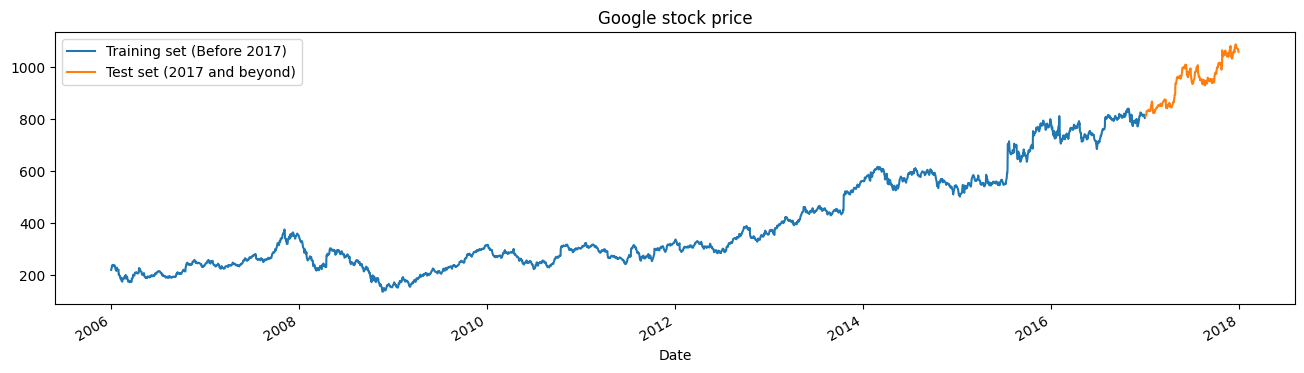

In [16]:
# We have chosen 'High' attribute for prices.
df["High"][:'2016'].plot(figsize=(16,4),legend=True)
df["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Google stock price')
plt.show()

## Data Preprocessing

Scaling the training set

In [17]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
training_set_scaled.shape

(2768, 1)

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output. So for each element of training set, we have 60 previous training set elements

In [21]:
X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping X_train for efficient modelling

In [22]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## LSTM Model

In [25]:
# The LSTM architecture
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0330
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0080
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0059
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0039
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0050
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0038
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0033
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0029
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0028
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0030
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0021
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0026
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021
Epoc


## Make preductuion with LSTM model

In [26]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((df["High"][:'2016'],df["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [27]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


Visualizing the results

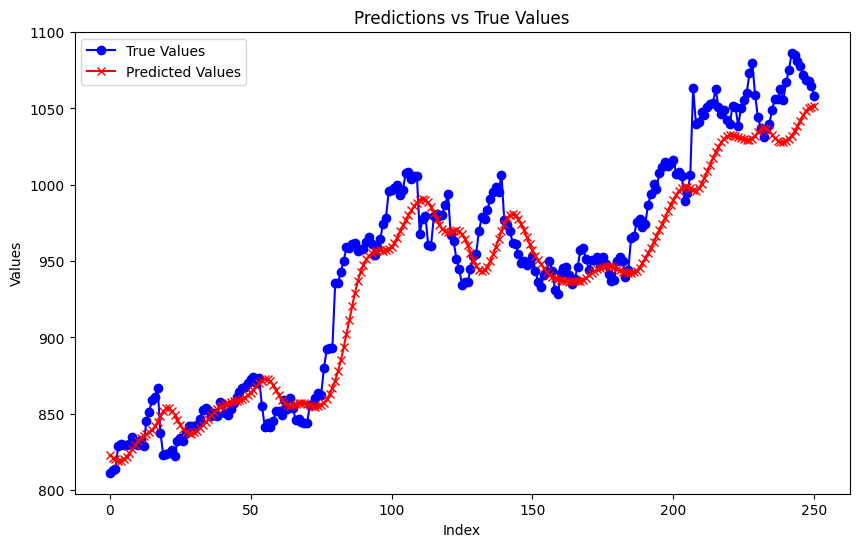

In [28]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

Evaluating LSMT Model

In [29]:
# Evaluating our model
calculate_rmse(test_set,predicted_stock_price)

23.126699076043995

In [39]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 23.126699076043995.


## GRU Model

In [32]:
# The GRU architecture
regressorGRU = Sequential()

# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1004
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0259
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0032
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0030
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0027
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0025
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0024
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0027
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0024
Epoch 16/50
19/


## Make preductuion with GRU model

In [33]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


Visualizing the Results

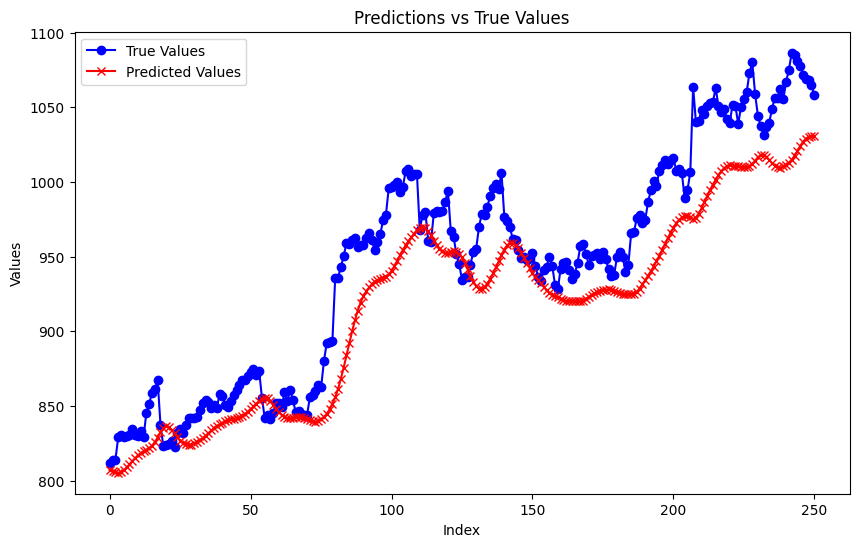

In [34]:
plot_predictions(test_set,GRU_predicted_stock_price)

Evaluating GRU Model

In [35]:

calculate_rmse(test_set,GRU_predicted_stock_price)

35.106433813318404

In [40]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 23.126699076043995.


# it seem the LTSM is accurate batter then GRU but GRU is faster then LSTM